### Student Information
Name: 林哲兆 (NTPU)

Student ID: 711233103
 
GitHub ID: JoshLin1112

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

---
### Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though). 

In [ ]:
#  In the this part, I will do the 19 exercises again and some processes that aren't exercise one but important on the new dataset.

## 2. Data Preparation + 3. Data Transformation

In [1]:
import pandas as pd
senti_yt_df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
senti_yt_df.head(5)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...

---
### **>>> Exercise 1-2 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [2]:
for i in range(3):
    print(f"News {i+1}")
    print("\n".join(senti_yt_df['comment'][i].split("\n")))
    print('-'*100)

News 1
He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
----------------------------------------------------------------------------------------------------
News 2
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
----------------------------------------------------------------------------------------------------
News 3
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I th

---
### 3.2 Familiarizing yourself with the Data
### **>>> Exercise 2-2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
# do some other querying techniques
senti_yt_df[senti_yt_df['sentiment'] == 'nostalgia']

sentiment                                            comment
1     nostalgia  The mist beautiful voice ever I listened to hi...
2     nostalgia  I have most of Mr. Reeves songs.  Always love ...
4     nostalgia  listening to his songs reminds me of my mum wh...
5     nostalgia  Every time I heard this song as a child, I use...
6     nostalgia  My dad loved listening to Jim Reeves, when I w...
...         ...                                                ...
1488  nostalgia  Yup !!!!  Bringing back an Enormous amount of ...
1491  nostalgia  real music...how i miss those days...brings ba...
1492  nostalgia  i used to cry over this song cause i had a boy...
1498  nostalgia  I was born in 1954 and started to be aware of ...
1499  nostalgia  This is the first CD I bought after my marriag...

[750 rows x 2 columns]

In [4]:
# do some other querying techniques
random_wordlist = ['love', 'beautiful', 'like']
senti_yt_df[senti_yt_df['comment'].str.contains('|'.join(random_wordlist))]

sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
6         nostalgia  My dad loved listening to Jim Reeves, when I w...
7         nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...
...             ...                                                ...
1493  not nostalgia  He really has that "love you like a brother" l...
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[525 rows x 2 columns]

---
### **>>> Exercise 3-2 (Watch Video):**  
Try to fetch records belonging to the ```nostalgia``` category, and query every 10th record. Only show the first 5 records.

In [5]:
senti_yt_df[senti_yt_df['sentiment'] == 'nostalgia'][::10].head(5)

sentiment                                            comment
1   nostalgia  The mist beautiful voice ever I listened to hi...
18  nostalgia  My Grandparents had a pub in the 1970's, this ...
32  nostalgia  I remember my Mom listening to Jim over and ov...
50  nostalgia  If I remember correctly, this song came out af...
71  nostalgia  Gosh does this bring back memories. Nearly eve...

---
## 4. Data Mining using Pandas
### >>> **Exercise 4-2 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [7]:
import helpers.data_mining_helpers as dmh

senti_yt_df.isnull().apply(lambda x: dmh.check_missing_values(x),axis=0)

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [8]:
senti_yt_df.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

---
## 5.  Data Preprocessing
### 5.1 Sampling

### >>> Exercise 6-2 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
senti_yt_df_sample = senti_yt_df.sample(n=1000).reset_index(drop=True)
senti_yt_df_sample.head(8)

sentiment                                            comment
0  not nostalgia  My husband who's currently out of the country ...
1  not nostalgia  Wow, this song has got to be one of the most r...
2      nostalgia  Wow I love this song takes me back to my teena...
3  not nostalgia  Nowadays they do not compose any beautiful son...
4  not nostalgia  man everytime I hear this song my allergies ac...
5      nostalgia  80's music are the best! I remembered my child...
6  not nostalgia  I wanna very much in love never thought feel t...
7  not nostalgia  It was originally released as a single by Fran...

---
### >>> **Exercise 7-2 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

sentiment
nostalgia        504
not nostalgia    496
Name: count, dtype: int64


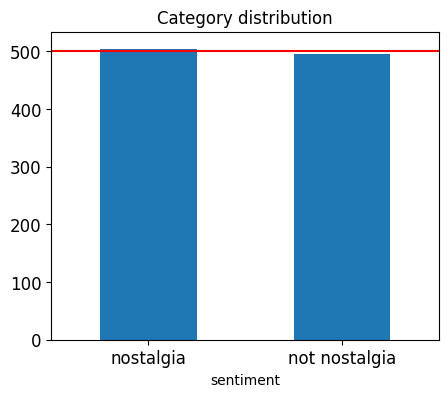

In [10]:
import matplotlib.pyplot as plt

# calculate the count of each category
print(senti_yt_df_sample['sentiment'].value_counts())
y_limit = max(senti_yt_df_sample['sentiment'].value_counts()) 
y_upper_bound = y_limit + 30
# plot barchart for X_sample
senti_yt_df_sample['sentiment'].value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, y_upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (5,4))
# gragh a y=500 line
plt.axhline(y=500, color='r', linestyle='-')

---
### >>> **Exercise 8-2 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

               All data  Sample data
sentiment                           
nostalgia           750          504
not nostalgia       750          496


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

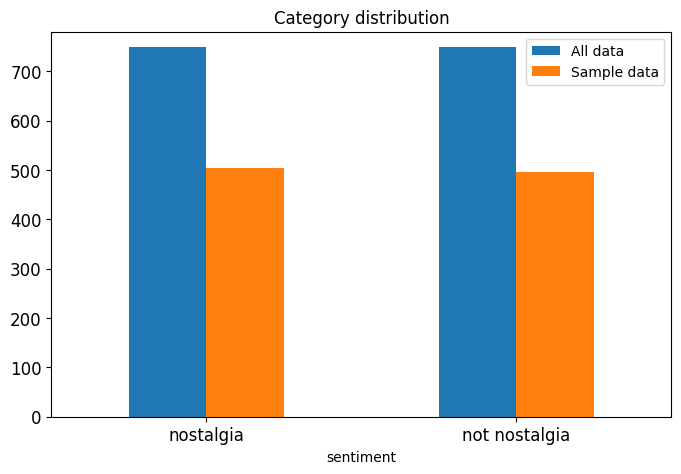

In [11]:
# first : merge two count table
sample_count = senti_yt_df_sample['sentiment'].value_counts()
all_count = senti_yt_df['sentiment'].value_counts()
category_counts = pd.merge(all_count,sample_count, left_index=True, right_index=True, how='outer')

# second : rename columns
category_counts.rename(columns={'count_x': 'All data', 'count_y': 'Sample data'}, inplace=True)
print(category_counts)
# third : plot barchart
y_limit = max(senti_yt_df['sentiment'].value_counts()) 
y_upper_bound = y_limit + 30
category_counts.plot(kind='bar', title='Category distribution', 
                     ylim=[0, y_upper_bound], 
                     rot=0, fontsize=12, figsize=(8,5))

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
senti_yt_df_counts = count_vect.fit_transform(senti_yt_df['comment']) #learn the vocabulary and return document-term matrix
print(senti_yt_df_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [13]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---
### 5.2 Feature Creation

In [14]:
import nltk
senti_yt_df['unigrams'] = senti_yt_df['comment'].apply(lambda x: dmh.tokenize_text(x))
senti_yt_df[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

---
### 5.3 Feature subset selection

### **>>> Exercise 9-2 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [15]:
analyze(senti_yt_df['comment'][0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

---
### **>>> Exercise 10-2 (take home):**
Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [16]:
import numpy as np
# store the first sample of senti_yt_df
senti_first_vec = senti_yt_df_counts[0,:].toarray() 

# find the index of value that is nonzero.
non_zero_index = np.where(senti_first_vec != 0)[1]
print(non_zero_index)
count_vect.get_feature_names_out()[non_zero_index]

[  15  214  233  245  258  323  573  593  907 1125 1249 1272 1347 1470
 1512 1591 1598 1606 1651 1733 1833 1964 2018 2028 2035 2082 2328 2341
 2671 2688 2973 2974 3124 3278 3282 3284 3304 3328 3336 3534 3538 3570
 3581 3650 3713]


array(['16years', 'age', 'all', 'although', 'and', 'at', 'but', 'can',
       'days', 'emotional', 'fan', 'feel', 'for', 'golden', 'great',
       'have', 'he', 'hear', 'his', 'in', 'jim', 'life', 'lord', 'love',
       'loving', 'many', 'now', 'of', 'reeves', 'relaxed', 'singer',
       'singers', 'still', 'thank', 'that', 'the', 'those', 'time', 'to',
       'voice', 'vouch', 'was', 'we', 'with', 'you'], dtype=object)

In [17]:
senti_yt_df_counts_array = senti_yt_df_counts.toarray()
# calculate the total term frequencies.
word_frequcy = np.sum(senti_yt_df_counts_array,axis=0)
# search a proper threshold
for i in np.arange(100, 500, 50):
    hf_word_number = len(np.where(word_frequcy > i)[0]) # find the index of terms that appear more than i
    print(f'There are {hf_word_number} words that appeared more than {i} times')

There are 59 words that appeared more than 100 times
There are 38 words that appeared more than 150 times
There are 25 words that appeared more than 200 times
There are 20 words that appeared more than 250 times
There are 16 words that appeared more than 300 times
There are 14 words that appeared more than 350 times
There are 10 words that appeared more than 400 times
There are 10 words that appeared more than 450 times


---

### 5.4 Attribute Transformation / Aggregation

### **>>> Exercise 11-2 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

['and' 'back' 'for' 'in' 'is' 'it' 'love' 'me' 'music' 'my' 'of' 'so'
 'song' 'that' 'the' 'this' 'to' 'was' 'when' 'you']


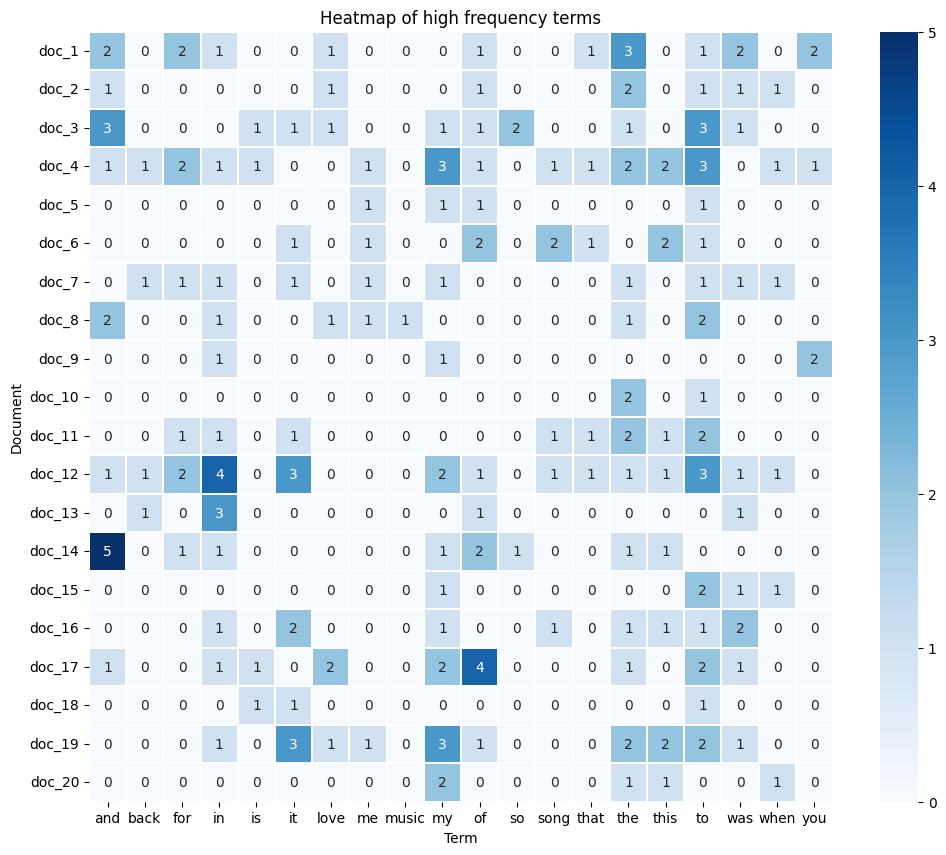

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# find the high frequency terms. (which appered more than 250 times)
thereshold = 250
feature_index = np.where(word_frequcy > thereshold)[0]
high_freq_words = count_vect.get_feature_names_out()[feature_index]
print(high_freq_words)

# use 20 samples and top 20 high frequency terms to generate a heat map.
sample_size = 20 
hf_word_matrix = senti_yt_df_counts[:sample_size, feature_index].toarray()

# generate a heat map by seaborn package.
doc_label = [f'doc_{i+1}' for i in range(sample_size)]
fig, ax = plt.subplots(figsize = (12, 10)) 
ax = sns.heatmap(hf_word_matrix, xticklabels=high_freq_words ,yticklabels=doc_label ,cmap='Blues', linewidths = 0.005, annot = True, cbar=True)
plt.xlabel('Term')
plt.ylabel('Document')
plt.title('Heatmap of high frequency terms')
plt.show()

In [19]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,senti_yt_df_counts.shape[1]):
    term_frequencies.append(sum(senti_yt_df_counts[:,j].toarray()))
term_frequencies = np.asarray(senti_yt_df_counts.sum(axis=0))[0]

---
### >>> **Exercise 12-2 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [20]:
import plotly.graph_objects as go

x_values = count_vect.get_feature_names_out()[:300]
y_values = term_frequencies[:300]

# use plotly package create a frequency bar chart for the first 300 terms.
fig = go.Figure(go.Bar(x=x_values, y=y_values))
fig.update_layout(
    width=10000, 
    height=500,  
    xaxis=dict(
        tickangle=-90  
    ),
    title="Term Frequencies for First 300 Terms",
    xaxis_title="Terms",
    yaxis_title="Frequencies",
)
fig.show()

---
### >>> **Exercise 13-2 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [21]:
# find the index of the words that appear more than 20 times
thereshold = 20
feature_index = np.where(word_frequcy > thereshold)[0]
high_freq_words = count_vect.get_feature_names_out()[feature_index]

x_values = high_freq_words
y_values = word_frequcy[feature_index]

sorted_indices = np.argsort(y_values)[::-1]

sorted_x_values = x_values[sorted_indices]
sorted_y_values = y_values[sorted_indices]

fig = go.Figure(go.Bar(x=sorted_x_values, y=sorted_y_values))

fig.update_layout(
    width=2000, 
    height=500,  
    xaxis=dict(
        tickangle=-90  
    ),
    title="Term Frequencies for the terms apppered more than 20 times",
    xaxis_title="Terms",
    yaxis_title="Frequencies",
)
fig.show()

---
### >>> **Exercise 14-2 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [22]:
# find the index of the words that appear more than 200 times
thereshold = 200
above_index = np.where(word_frequcy > thereshold)[0]
n_above = len(above_index)
below_index = np.where(word_frequcy <= thereshold)[0]
n_below = len(below_index)

# Divide the data into two parts : words appeared more than 500 times or less than 500 times.
x1_values = list(range(n_above)) 
y1_values = word_frequcy[above_index]
x2_values = list(range(n_above, n_above + n_below))  
y2_values = word_frequcy[below_index]

# Data sorted by term frequencies.
sorted_indices_above = np.argsort(y1_values)[::-1]
sorted_indices_below = np.argsort(y2_values)[::-1]

# Take log transform of y values 
sorted_x1_values = x1_values
log_sorted_y1_values = y1_values[sorted_indices_above]
sorted_x2_values = x2_values
log_sorted_y2_values = y2_values[sorted_indices_below]

# Graph two parts of data in a single figure.
fig = go.Figure()

# Terms appeared more than 200 times
fig.add_trace(go.Scatter(
    x=sorted_x1_values,
    y=log_sorted_y1_values,
    mode='lines',
    line=dict(color='red'),
    fill='tozeroy', 
    name=f'Frequency Above {thereshold}'
))

# Terms appeared less than 200 times
fig.add_trace(go.Scatter(
    x=sorted_x2_values, 
    y=log_sorted_y2_values,
    mode='lines',
    line=dict(color='orange'),
    fill='tozeroy', 
    name=f'Frequency Below {thereshold}'
))

# Update the layout
fig.update_layout(
    title="Long Tail Distribution of Term Frequencies",
    xaxis_title="Rank",
    yaxis_title="Frequency",
    template='plotly_dark', 
    xaxis=dict(range=[0, 300]),
    # xaxis=dict(type='linear'), 
    yaxis=dict(type='linear')
)
fig.show()

---
### >>> **Exercise 15-2 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [23]:
# find the index of the words that appear more than 500 times
thereshold = 200
above_index = np.where(word_frequcy > thereshold)[0]
n_above = len(above_index)
below_index = np.where(word_frequcy <= thereshold)[0]
n_below = len(below_index)

# Divide the data into two parts : words appeared more than 500 times or less than 500 times.
x1_values = list(range(n_above)) 
y1_values = word_frequcy[above_index]
x2_values = list(range(n_above, n_above + n_below))  
y2_values = word_frequcy[below_index]

# Data sorted by term frequencies.
sorted_indices_above = np.argsort(y1_values)[::-1]
sorted_indices_below = np.argsort(y2_values)[::-1]

# Take log transform of y values 
sorted_x1_values = x1_values
log_sorted_y1_values = np.log(y1_values[sorted_indices_above])
sorted_x2_values = x2_values
log_sorted_y2_values = np.log(y2_values[sorted_indices_below])

# Graph two parts of data in a single figure.
fig = go.Figure()

# Terms appeared more than 500 times
fig.add_trace(go.Scatter(
    x=sorted_x1_values,
    y=log_sorted_y1_values,
    mode='lines',
    line=dict(color='red'),
    fill='tozeroy', 
    name=f'Frequency Above {thereshold}'
))

# Terms appeared less than 500 times
fig.add_trace(go.Scatter(
    x=sorted_x2_values, 
    y=log_sorted_y2_values,
    mode='lines',
    line=dict(color='orange'),
    fill='tozeroy', 
    name=f'Frequency Below {thereshold}'
))

# Update the layout
fig.update_layout(
    title="Long Tail Distribution of Term Frequencies",
    xaxis_title="Rank",
    yaxis_title="Frequency",
    template='plotly_dark', 
    xaxis=dict(range=[0, 2000]),
    # xaxis=dict(type='linear'), 
    yaxis=dict(type='linear')
)
fig.show()

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create separate DataFrames for each category
categories = senti_yt_df['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = senti_yt_df[senti_yt_df['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

---

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = senti_yt_df['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = senti_yt_df[senti_yt_df['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [57]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'what', 'on', 'not', 'be', 'voice', 'can', 'me', 'just', 'beautiful', 'as', 'songs', 'time', 'her', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'never', 'know', 'now', 'about', 'much', 'who', 'really', 'more', 'we', 'if', 'best', 'by', 'ever', 'thank', 'would', 'think', 'still', 'only', 'don', 'how', 'very', 'has', 'there', 'am', 'out', 'could', 'him', 'these', 'old', 'an', 'up', 'do', 'listen', 'hear', 'singer', 'had', 'many', 'here', 'such', 'too', 'today', 'version', 'been', 'world', 'heard', 'most', 'your', 'get', 'people', 'some', 'video', 'man', 'sing', 'listening', 'real', 'than', 'were', 'years', 'nice', 'singing', 'heart', 'their', 'better', 'life', 'day', 'its', 'way', 'did', 'god', 'come', '

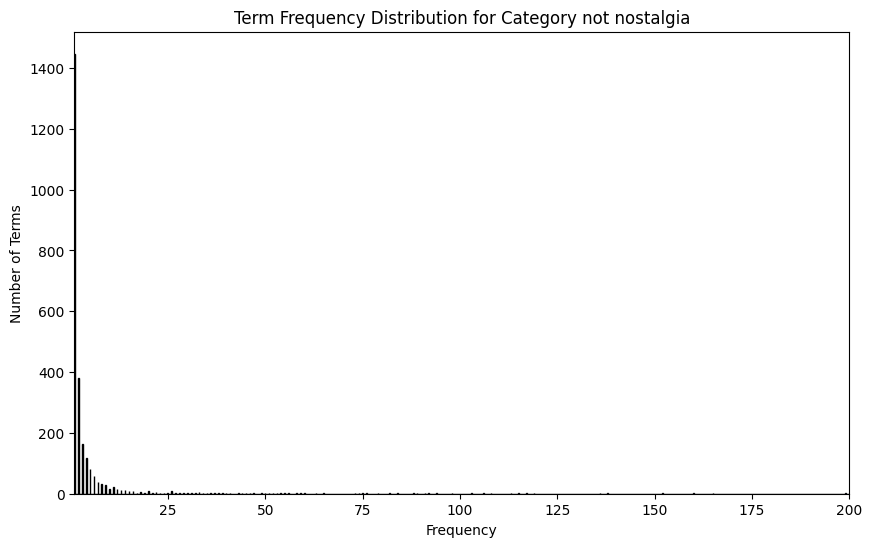

In [59]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [58]:
category_number=1
print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'what', 'on', 'not', 'be', 'voice', 'can', 'me', 'just', 'beautiful', 'as', 'songs', 'time', 'her', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'never', 'know', 'now', 'about', 'much', 'who', 'really', 'more', 'we', 'if', 'best', 'by', 'ever', 'thank', 'would', 'think', 'still', 'only', 'don', 'how', 'very', 'has', 'there', 'am', 'out', 'could', 'him', 'these', 'old', 'an', 'up', 'do', 'listen', 'hear', 'singer', 'had', 'many', 'here', 'such', 'too', 'today', 'version', 'been', 'world', 'heard', 'most', 'your', 'get', 'people', 'some', 'video', 'man', 'sing', 'listening', 'real', 'than', 'were', 'years', 'nice', 'singing', 'heart', 'their', 'better', 'life', 'day', 'its', 'way', 'did', 'god', 'come', 'why'

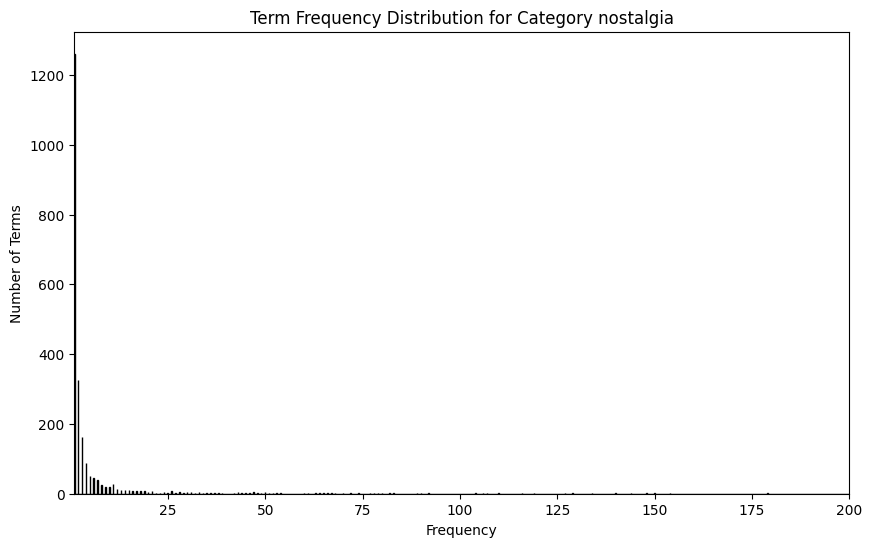

In [60]:
category_number=1 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [61]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
first       23
classic     23
amazing     24
wish        24
make        25
          ... 
of         361
to         394
and        451
this       453
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   
748    0    0   0    0    0   0   0   0   0    0  ...        0         0   
749    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  
748           0         0      0        0    0    0        0      0  
749           0         0      0        0    0    0        0      0  

[750 rows x 2446 columns]


### >>> **Exercise 16-2 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [25]:
for i in range(2):

    category = categories[i]
    print("-"*30)
    print(f"Category {category}")
    print("number of features:", len(term_document_dfs[categories[i]].columns))

    # Get top 10 terms for each category
    top10_terms = term_document_dfs[category].sum().sort_values(ascending=False).head(10)

    # Create a DataFrame
    df = pd.DataFrame(top10_terms,columns=[category])
    display(df)

------------------------------
Category not nostalgia
number of features: 2602


not nostalgia
the             708
this            453
and             451
to              394
of              361
song            309
it              268
is              265
in              263
you             238

------------------------------
Category nostalgia
number of features: 2295


nostalgia
the         643
my          566
this        545
to          543
and         472
song        440
was         432
of          361
in          349
it          318

---

In [26]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 750
Number of items : 2295
Minimum Transaction Size : 3
Average Transaction Size : 21.644
Maximum Transaction Size : 70
Standard Deviation Transaction Size : 13.110095245013795
Variance in Transaction Sizes : 172.1040694259012
Sparsity : 0.9905690631808279


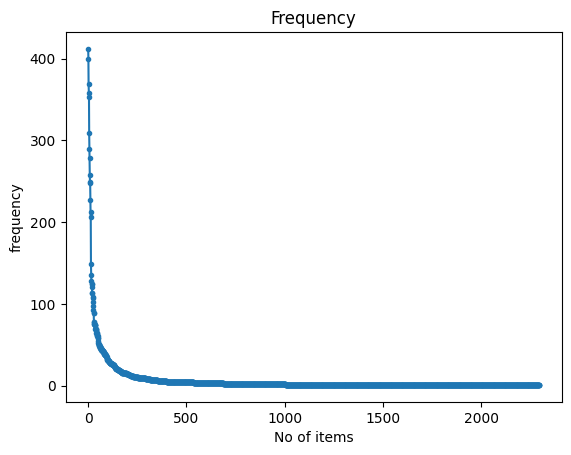

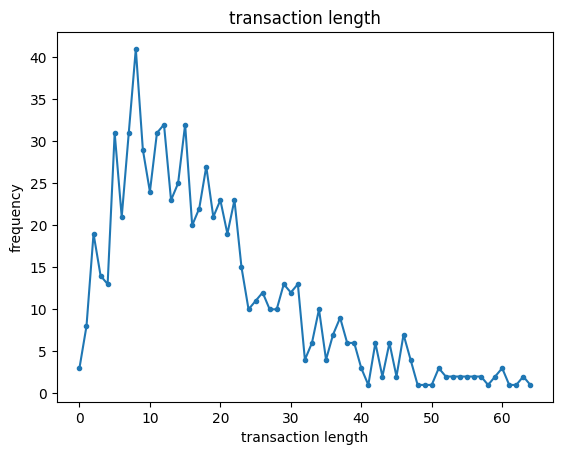

In [54]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 750
Number of items : 2602
Minimum Transaction Size : 4
Average Transaction Size : 20.036
Maximum Transaction Size : 71
Standard Deviation Transaction Size : 10.366743493820355
Variance in Transaction Sizes : 107.61285447263018
Sparsity : 0.9922997694081476


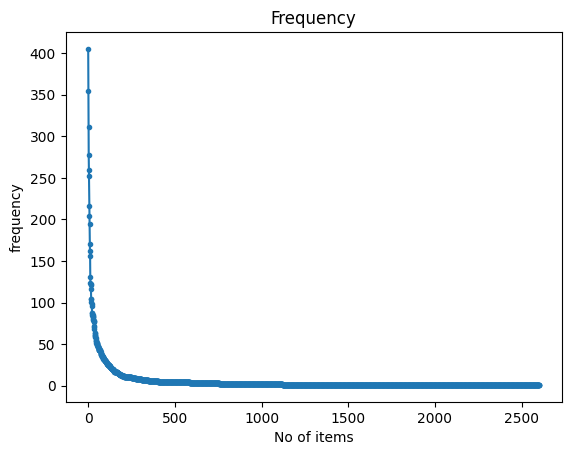

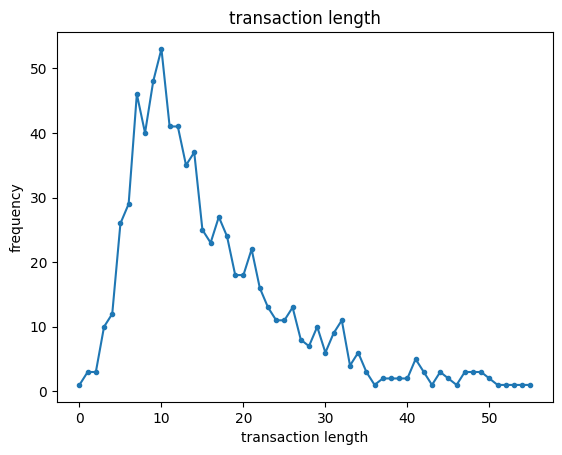

In [55]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

### >>> **Exercise 17-2 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of **200, 500, 1000**, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [27]:
# I revised the k values to be 200, 500, 1000.
# Because when I used k value higher than 1000, the runtime was too long.

from PAMI.frequentPattern.topk import FAE as alg_topk

# define a function to run TopK algorithm
def run_fae_topk(file_path, k):

    obj = alg_topk.FAE(iFile=file_path, k=k)
    obj.mine()
    topKFrequentPatterns = obj.getPatterns() 
    print("Total number of Frequent Patterns:", len(topKFrequentPatterns))
    runtime = obj.getRuntime()
    return topKFrequentPatterns, runtime

file_path = 'td_freq_db_nostalgia.csv'
k_values = [200, 500, 1000]

print("FAE Top-K results:")
for k in k_values:
    patterns, runtime = run_fae_topk(file_path, k)
    print(f"runtime:{runtime:.2f}")
    print("first three patterns:")
    for i, (pattern, support) in enumerate(list(patterns.items())[:3]):
        print(f"  {pattern}: {support}")
    print()

FAE Top-K results:
 TopK frequent patterns were successfully generated using FAE algorithm.
Total number of Frequent Patterns: 200
runtime:0.08
first three patterns:
  this: 412
  my: 400
  the: 369

 TopK frequent patterns were successfully generated using FAE algorithm.
Total number of Frequent Patterns: 500
runtime:0.44
first three patterns:
  this: 412
  my: 400
  the: 369

 TopK frequent patterns were successfully generated using FAE algorithm.
Total number of Frequent Patterns: 1000
runtime:3.12
first three patterns:
  this: 412
  my: 400
  the: 369



In [28]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg_maxfp

# define a function to run MaxFPGrowth algorithm
def run_maxfpgrowth(file_path, min_sup):

    obj = alg_maxfp.MaxFPGrowth(iFile=file_path, minSup=min_sup)
    obj.mine()
    maxfpgroethpatterns = obj.getPatterns()
    print("Total number of Frequent Patterns:", len(maxfpgroethpatterns))
    runtime = obj.getRuntime()
    return maxfpgroethpatterns, runtime

file_path = 'td_freq_db_nostalgia.csv'
min_sup_values = [3, 6, 9]

print("MaxFPGrowth results:")
for min_sup in min_sup_values:
    patterns, runtime = run_maxfpgrowth(file_path, min_sup)
    print(f"min_sup = {min_sup}:")
    print(f"number of patterm:{len(patterns)}")
    print(f"runtime:{runtime:.2f}")
    print("first three patterns:")
    for i, (pattern, support) in enumerate(list(patterns.items())[0:3]):
        print(f"  {pattern}: {support}")
    print()

MaxFPGrowth results:
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns: 47915
min_sup = 3:
number of patterm:47915
runtime:46.48
first three patterns:
  the	skating	: 3
  the	and	walker	: 3
  and	in	scott	: 3

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns: 28197
min_sup = 6:
number of patterm:28197
runtime:9.16
first three patterns:
  1973	: 6
  the	looking	: 6
  actually	: 6

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns: 14451
min_sup = 9:
number of patterm:14451
runtime:2.62
first three patterns:
  karen	: 9
  right	: 9
  to	place	: 9



----

In [29]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia = obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 9704
Runtime: 0.15610265731811523


In [30]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_nostalgia = obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 71737
Runtime: 0.6285727024078369


In [31]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                       Patterns  Support
74586                     to my      227
72337                  memories      227
74590                  the this      212
74581                   song my      212
74588                    the my      192
...                         ...      ...
35820             we that on to        9
35803  was we that it song this        9
35802      we that it song this        9
35801       we that it song was        9
37295        miss me of this my        9

[74591 rows x 2 columns]
Number of patterns discarded: 6850


In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
senti_tdm = count_vect.fit_transform(senti_yt_df['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
senti_yt_df['tokenized_text'] = senti_yt_df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=senti_yt_df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = senti_yt_df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
senti_tdm_df = pd.DataFrame(senti_tdm.toarray(), columns=terms, index=senti_yt_df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([senti_tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  we that on when and  \
0      0    0    0   0   0    0    0   0     0   0  ...                    0   
1      0    0    0   0   0    0    0   0     0   0  ...                    0   
2      0    0    0   0   0    0    0   0     0   0  ...                    0   
3      0    0    0   0   0    0    0   0     0   0  ...                    0   
4      0    0    0   0   0    0    0   0     0   0  ...                    0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...                  ...   
1495   0    0    0   0   0    0    0   0     0   0  ...                    0   
1496   0    0    0   0   0    0    0   0     0   0  ...                    0   
1497   0    0    0   0   0    0    0   0     0   0  ...                    0   
1498   0    0    0   0   0    0    0   0     0   0  ...                    0   
1499   0    0    0   0   0    0    0   0     0   0  ...                    0   

      we that on when  we that on in and  we that on in  we that on to and  \
0                   0                  0              0                  0   
1                   0                  0              0                  0   
2                   0                  0              0                  0   
3                   0                  0              0                  0   
4                   0                  0              0                  0   
...               ...                ...            ...                ...   
1495                0                  0              0                  0   
1496                0                  0              0                  0   
1497                0                  0              0                  0   
1498                0                  0              0                  0   
1499                0                  0              0                  0   

      we that on to  was we that it song this  we that it song this  \
0                 0                         0                     0   
1                 0                         0                     0   
2                 0                         0                     0   
3                 0                         0                     0   
4                 0                         0                     0   
...             ...                       ...                   ...   
1495              0                         0                     0   
1496              0                         0                     0   
1497              0                         0                     0   
1498              0                         0                     0   
1499              0                         0                     0   

      we that it song was  miss me of this my  
0                       0                   0  
1                       0                   0  
2                       0                   0  
3                       0                   0  
4                       0                   0  
...                   ...                 ...  
1495                    0                   0  
1496                    0                   0  
1497                    0                   0  
1498                    0                   0  
1499                    0                   0  

[1500 rows x 78321 columns]

---
### 5.5 Dimensionality Reduction

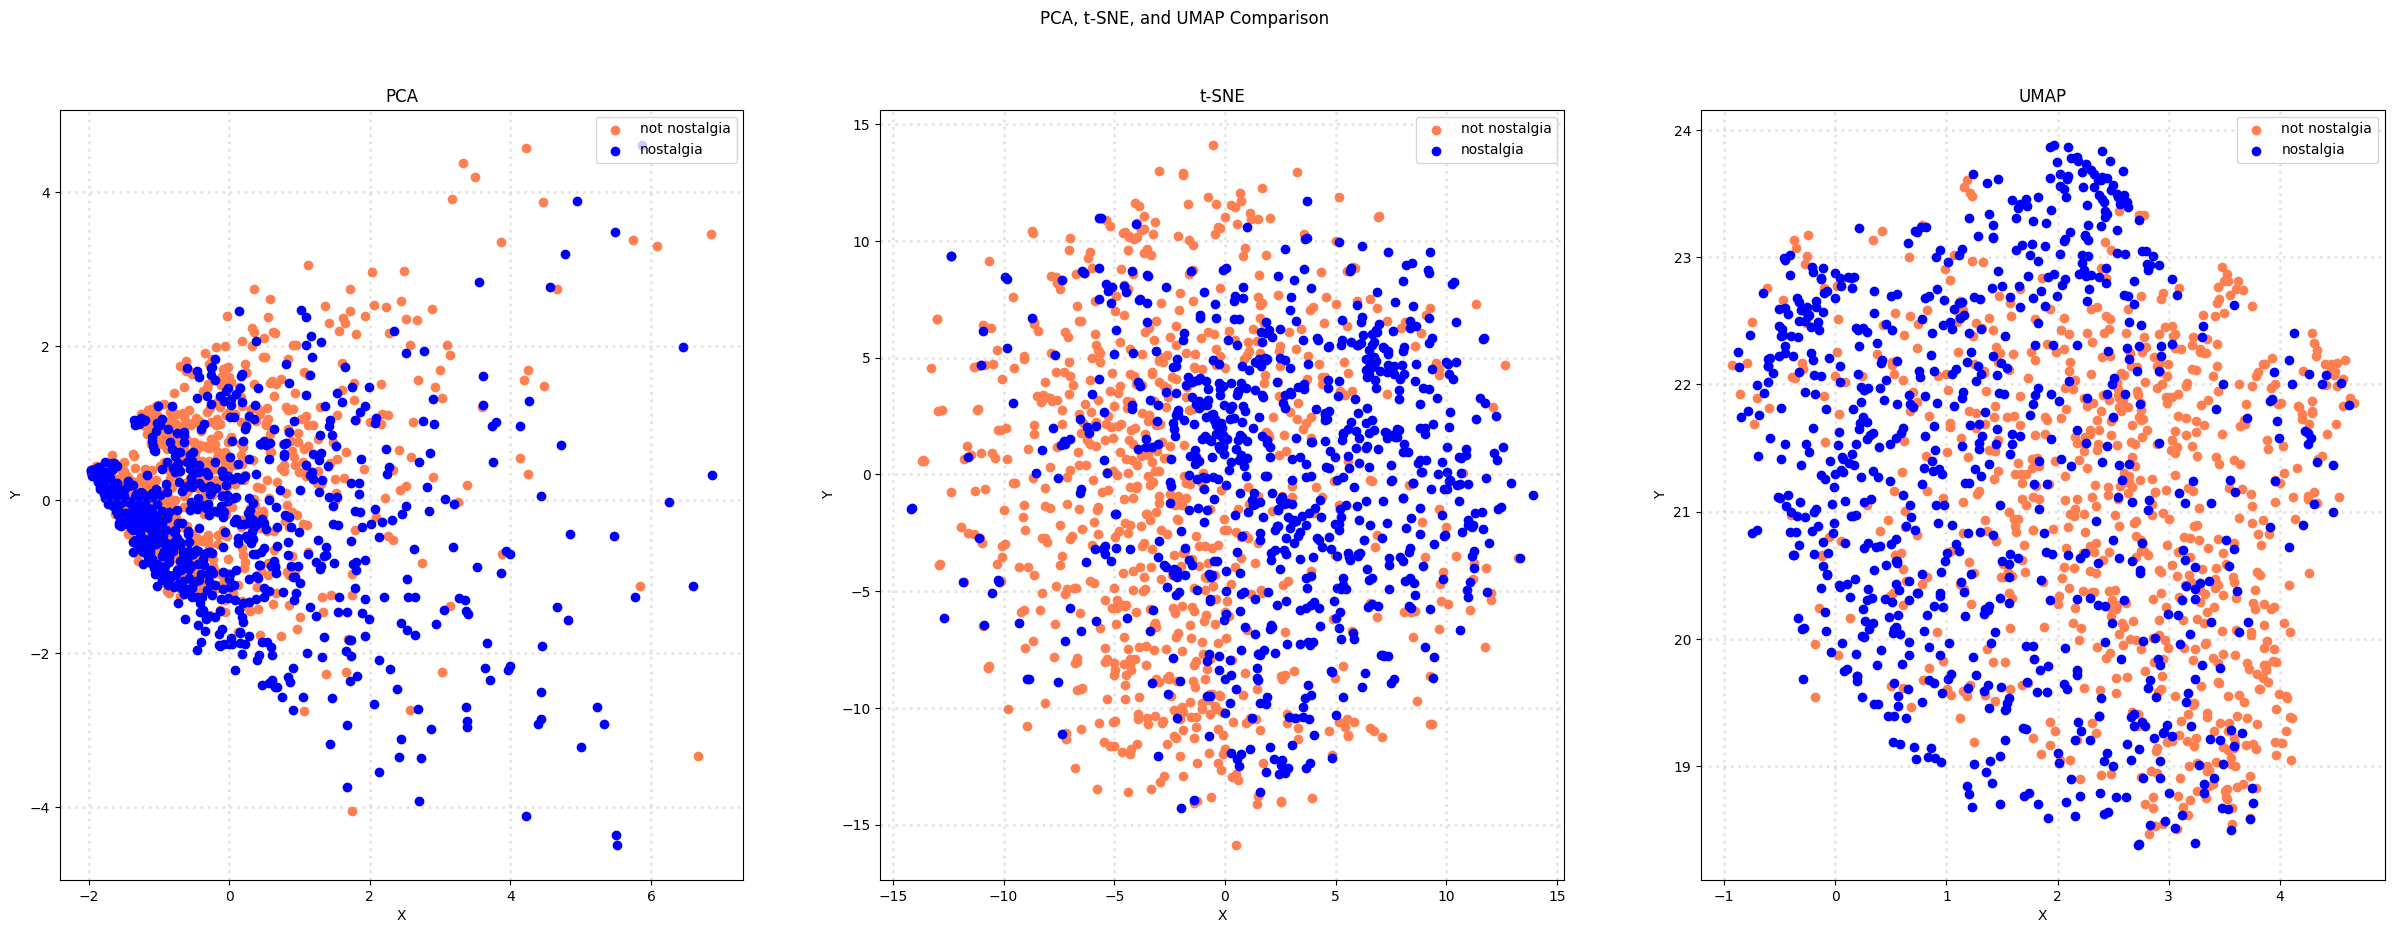

In [33]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# import umap
import umap.umap_ as umap
import matplotlib.pyplot as plt
# Plot the results in subplots
col = ['coral', 'blue']
categories = senti_yt_df['sentiment'].unique() 
senti_pca_tdm = PCA(n_components=2).fit_transform(senti_tdm_df.values)
senti_tsne_tdm = TSNE(n_components=2).fit_transform(senti_tdm_df.values)
senti_umap_tdm = umap.UMAP(n_components=2).fit_transform(senti_tdm_df.values)

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[senti_yt_df['sentiment'] == category].T[0]
        ys = X_reduced[senti_yt_df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], senti_pca_tdm, 'PCA')
plot_scatter(axes[1], senti_tsne_tdm, 't-SNE')
plot_scatter(axes[2], senti_umap_tdm, 'UMAP')

plt.show()

In [34]:
# Apply PCA, t-SNE, and UMAP to the data
senti_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
senti_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
senti_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

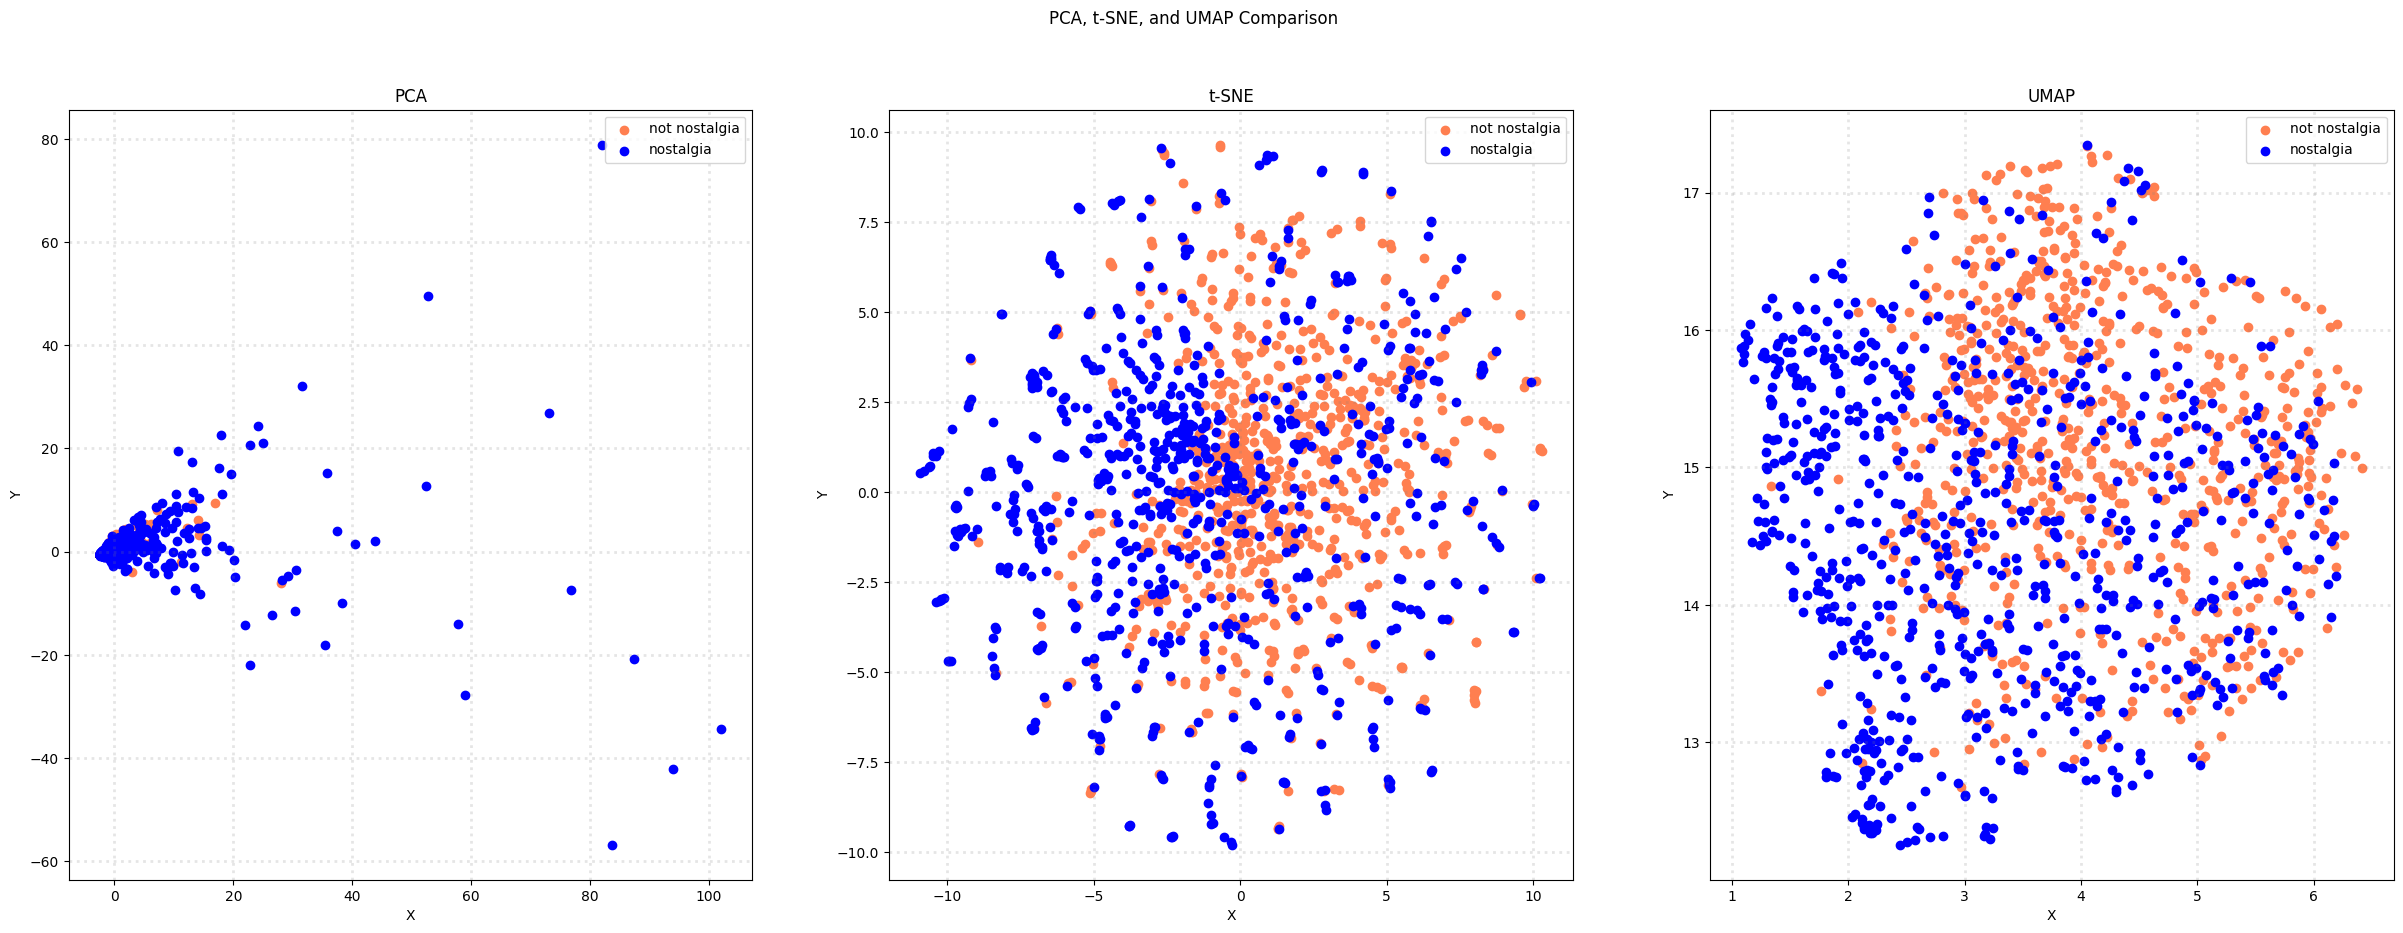

In [35]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# import umap
import umap.umap_ as umap
import matplotlib.pyplot as plt
# Plot the results in subplots
col = ['coral', 'blue']
categories = senti_yt_df['sentiment'].unique() 
senti_pca_tdm = PCA(n_components=2).fit_transform(senti_tdm_df.values)
senti_tsne_tdm = TSNE(n_components=2).fit_transform(senti_tdm_df.values)
senti_umap_tdm = umap.UMAP(n_components=2).fit_transform(senti_tdm_df.values)

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], senti_pca_aug, 'PCA')
plot_scatter(axes[1], senti_tsne_aug, 't-SNE')
plot_scatter(axes[2], senti_umap_aug, 'UMAP')

plt.show()

### >>> Exercise 18-2 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

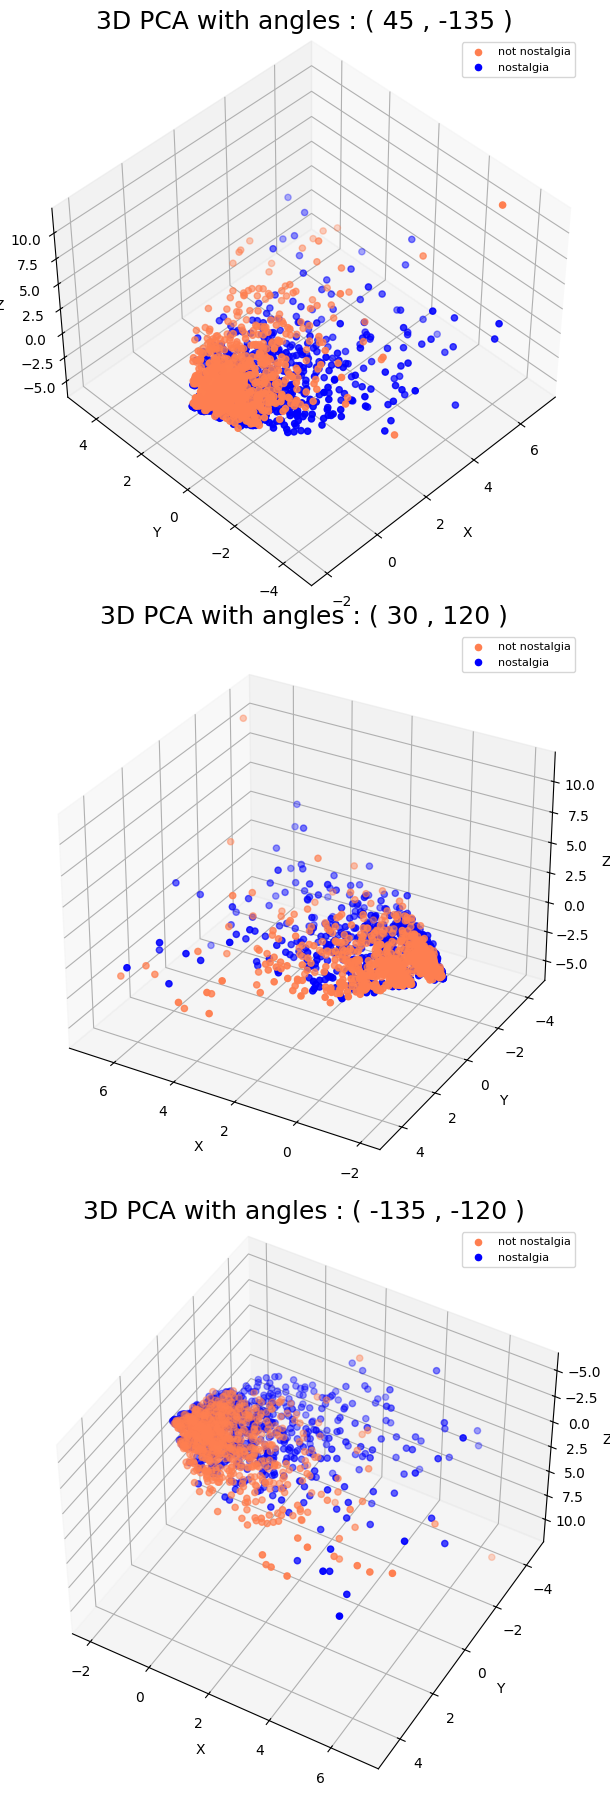

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# use four color for each category
col = ['coral', 'blue']
categories = senti_yt_df['sentiment'].unique() 
senti_pca_tdm = PCA(n_components=3).fit_transform(senti_tdm_df.values)

# define a function to plot the scatter plot with different angles
def plot_scatter_diff_angle(ax, X_reduced, angle_1=0, angle_2=0):
    for c, category in zip(col, categories):
        xs = X_reduced[senti_yt_df['sentiment'] == category].T[0]
        ys = X_reduced[senti_yt_df['sentiment'] == category].T[1]
        zs = X_reduced[senti_yt_df['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(f'3D PCA with angles : ( {angle_1} , {angle_2} )',fontsize=18)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right',fontsize=8)
    ax.view_init(angle_1, angle_2)


fig, ax = plt.subplots(3, 1, figsize=(10, 18), subplot_kw={'projection': '3d'})
# Custom angles
angle_set = [[45, -135], [30, 120], [-135, -120]]
for i in range(3):
    plot_scatter_diff_angle(ax[i], senti_pca_tdm, angle_set[i][0], angle_set[i][1])

plt.tight_layout()
plt.show()


---

### 5.6 Discretization and Binarization 

### >>> **Exercise 19-2 (take home):**
Try to generate the binarization using the `sentiment` column instead. Does it work?

In [37]:
from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()
# change category to category_name
mlb.fit(senti_yt_df['sentiment'].unique())
senti_yt_df['bin_category'] = mlb.transform(senti_yt_df['sentiment']).tolist()
senti_yt_df[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_category  
0  {time., Jim, age, life., now., fan, golden, fe...          [1]  
1  {singing, Never, ever, still, his, beautiful, ...          [0]  
2  {it, simple, who, town, graduated, age, but, l...          [0]  
3  {me", Nam, song, This, tour., who, served, day...          [1]  
4  {reminds, his, who, me, listening, him, everyd...          [0]  
5  {it, song, me, Jim, fear, your, appreciate, ti...          [0]  
6  {it, didn't, me, Jim, but, teenager, do, thing...          [0]  
7  {music., nostalgic, Jim, TO, me, 71, ., puts, ...          [0]  
8        {heart, in, my, Wherever, always, you, are}          [1]

---
### 6. Data Exploration

In [38]:
document_to_transform_1 = []
random_record_1 = senti_yt_df.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = senti_yt_df.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = senti_yt_df.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [39]:
from sklearn.preprocessing import binarize

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [40]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.124611
Cosine Similarity using count bw 1 and 3: 0.170251
Cosine Similarity using count bw 2 and 3: 0.121988
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_12756\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_12756\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_12756\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_12756\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

---
# 7. Data Classification

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Convert the numerical category labels to text labels
category_mapping = dict(zip(range(0, 2),senti_yt_df['sentiment'].unique()))
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(senti_tdm_df, senti_yt_df['sentiment'], test_size=0.3, random_state=42)

In [42]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=2))

Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia       0.79      0.93      0.85       225
    nostalgia       0.91      0.76      0.83       225

     accuracy                           0.84       450
    macro avg       0.85      0.84      0.84       450
 weighted avg       0.85      0.84      0.84       450



In [43]:
X_train, X_test, y_train, y_test = train_test_split(augmented_df, senti_yt_df['sentiment'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=2))

Accuracy: 0.7955555555555556

Classification Report:
                precision    recall  f1-score   support

not nostalgia       0.94      0.63      0.76       225
    nostalgia       0.72      0.96      0.82       225

     accuracy                           0.80       450
    macro avg       0.83      0.80      0.79       450
 weighted avg       0.83      0.80      0.79       450



---
### Third: please attempt the following tasks on the new dataset. This part is worth 30% of your grade.
- Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.

In [44]:
# Wordcloud is a fancy visualizing tool for text data.
# It can display the most important terms of the texts.
# However, the stopwords would lead bias of important terms.
# Therefore, I displayed the wordcloud with two version: 
# one with stopwords and one without stopwords.

Wordcloud of term frequency with stopwords:


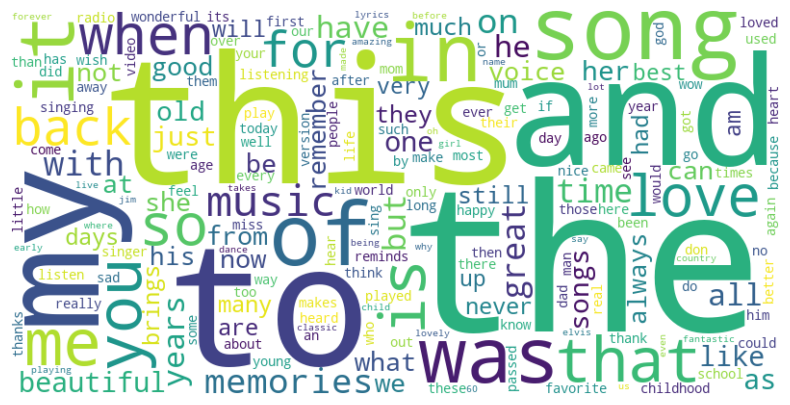

Wordcloud of term frequency without stopwords:


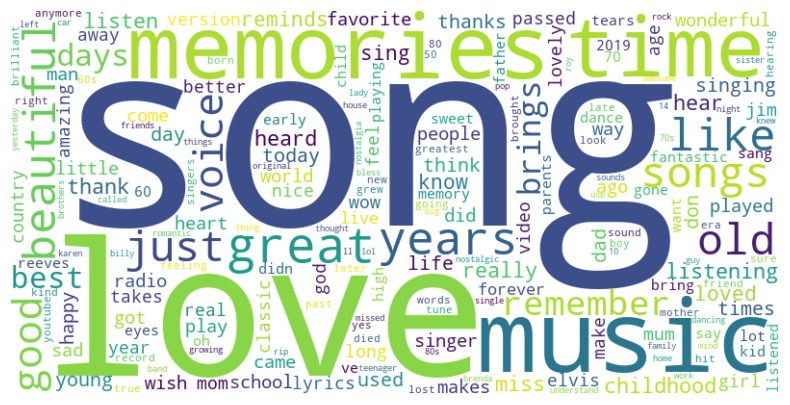

In [45]:
# First, I use term frequency approach to generate the wordcloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

# wordcloud generating function
def generate_wordcloud(count_matrix, feature_names):

    word_score_dict = dict(zip(feature_names, count_matrix.toarray().sum(axis=0)))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_score_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# term frequency wordcloud with stopwords
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(senti_yt_df['comment'])
feature_names = count_vectorizer.get_feature_names_out()
print('Wordcloud of term frequency with stopwords:')
generate_wordcloud(count_matrix, feature_names)

# term frequency wordcloud without stopwords
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(senti_yt_df['comment'])
feature_names = count_vectorizer.get_feature_names_out()
print('Wordcloud of term frequency without stopwords:')
generate_wordcloud(count_matrix, feature_names)

In [46]:
# Clearly, the wordcloud of term frequency with stopwords is more informative than 
# that of term frequency without stopwords.

Wordcloud of term frequency in not nostalgia category:


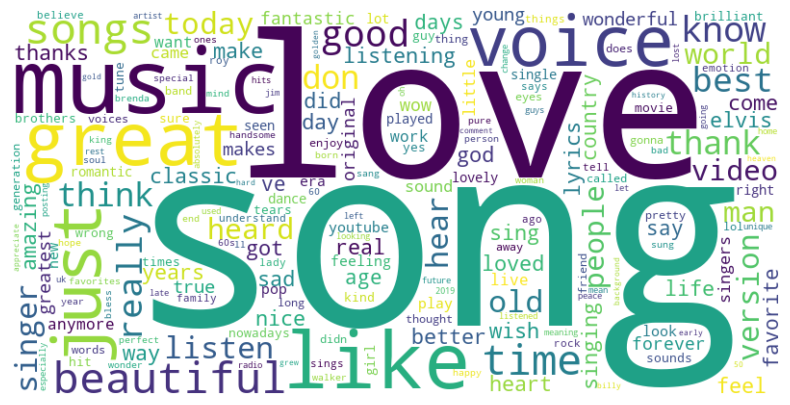

Wordcloud of term frequency in nostalgia category:


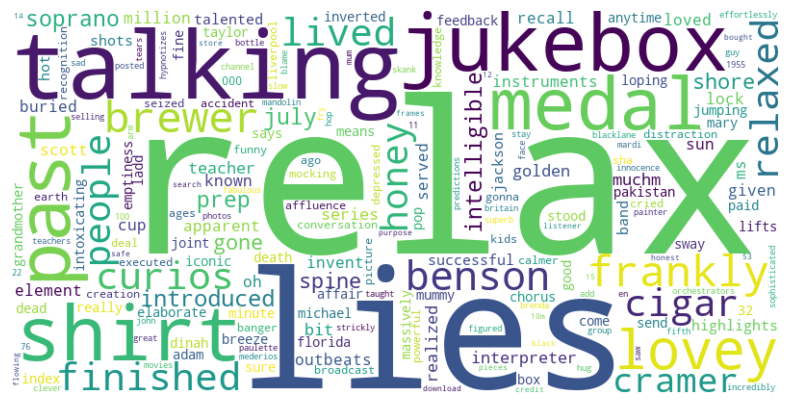

In [47]:
# Next, we can also check the difference of wordcloud between the two categories

nostalgia = senti_yt_df[senti_yt_df['sentiment'] == 'nostalgia']
not_nostalgia = senti_yt_df[senti_yt_df['sentiment'] != 'nostalgia']

# term frequency wordcloud with stopwords
count_vectorizer = CountVectorizer(stop_words='english')
# nostalgia
count_matrix_nostalgia = count_vectorizer.fit_transform(nostalgia['comment'])
# not_nostalgia
count_matrix_not_nostalgia = count_vectorizer.fit_transform(not_nostalgia['comment'])
feature_names = count_vectorizer.get_feature_names_out()
print('Wordcloud of term frequency in not nostalgia category:')
generate_wordcloud(count_matrix_not_nostalgia, feature_names)
print('Wordcloud of term frequency in nostalgia category:')
generate_wordcloud(count_matrix_nostalgia, feature_names)

- Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .

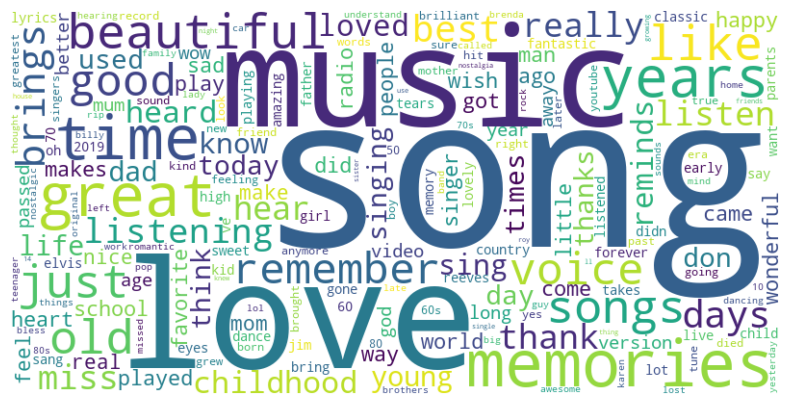

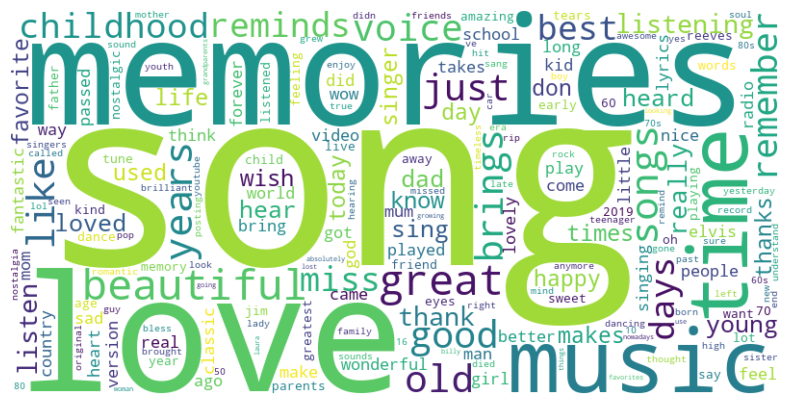

In [48]:
# Second, I used tf-idf approach to generate the wordcloud
# And compare it to the term frequency wordcloud

# term frequency without stopwords
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(senti_yt_df['comment'])
feature_names = count_vectorizer.get_feature_names_out()
generate_wordcloud(count_matrix, feature_names)

# Tf-idf without stopwords
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(senti_yt_df['comment'])
feature_names = tfidf_vectorizer.get_feature_names_out()
generate_wordcloud(tfidf_matrix, feature_names)

In [49]:
# We can see many common words like: love, song, music...,etc.
# In this case, the two approaches showed little difference in the wordcloud.

---
- Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

labels = senti_yt_df['sentiment']

# train and test split
# term frequency
X_count_train, X_count_test, y_count_train, y_count_test = train_test_split(count_matrix, labels, test_size=0.2, random_state=42)
# tf-idf
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

# model
nb_model_count = GaussianNB()
nb_model_tfidf = GaussianNB()

X_count_train_dense = X_count_train.toarray()
X_tfidf_train_dense = X_tfidf_train.toarray()
X_count_test_dense = X_count_test.toarray()
X_tfidf_test_dense = X_tfidf_test.toarray()

# Now fit your models with the dense data
nb_model_count.fit(X_count_train_dense, y_count_train)
nb_model_tfidf.fit(X_tfidf_train_dense, y_tfidf_train)

# prediction
y_count_pred = nb_model_count.predict(X_count_test_dense)
y_tfidf_pred = nb_model_tfidf.predict(X_tfidf_test_dense)

print('*'*50)
# calculate accuracy (term frequency)
accuracy_count = accuracy_score(y_count_test, y_count_pred)
print(f"Accuracy by word frequency: {accuracy_count:.2f}")

# classification report (term frequency)
print("Classification Report from word frequency:")
print(classification_report(y_count_test, y_count_pred))

print('*'*50)
# calculate accuracy (tf-idf)
accuracy_tfidf = accuracy_score(y_tfidf_test, y_tfidf_pred)
print(f"Accuracy by TF-IDF: {accuracy_tfidf:.2f}")

# classification report (tf-idf)
print("Classification Report from TF-IDF:")
print(classification_report(y_tfidf_test, y_tfidf_pred))


**************************************************
Accuracy by word frequency: 0.67
Classification Report from word frequency:
               precision    recall  f1-score   support

    nostalgia       0.62      0.92      0.74       152
not nostalgia       0.84      0.42      0.56       148

     accuracy                           0.67       300
    macro avg       0.73      0.67      0.65       300
 weighted avg       0.73      0.67      0.65       300

**************************************************
Accuracy by TF-IDF: 0.66
Classification Report from TF-IDF:
               precision    recall  f1-score   support

    nostalgia       0.62      0.85      0.72       152
not nostalgia       0.75      0.47      0.57       148

     accuracy                           0.66       300
    macro avg       0.69      0.66      0.65       300
 weighted avg       0.68      0.66      0.65       300



---
## 4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? 

In [51]:
# I thought what isn't complete is the lack of word-preprocessing.
# Pre-processing is necessary to make the text-data more informative when we apply BOW or Word2Vec.
# We can defined a pre-processing function to solve this problem.
# The function can be used to lowercase, remove punctuations, stopwords and lemmatize.

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # 1. Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # 2. Convert to lowercase
    text = text.lower()
    # 3. Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # 4. Lemmatize
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text


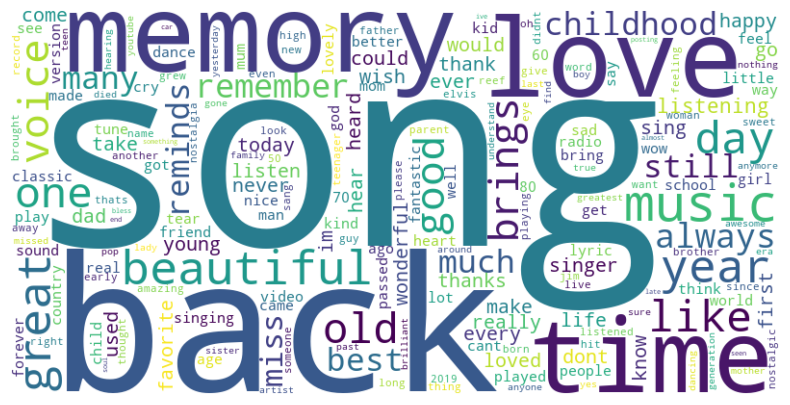

In [52]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import  TfidfVectorizer
from wordcloud import WordCloud

# With this function, we can preprocess the text first.
senti_yt_df['comment_processed'] = senti_yt_df['comment'].apply(preprocess_text)

# Then, we can apply TF-IDF   
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(senti_yt_df['comment_processed'])
feature_names = tfidf_vectorizer.get_feature_names_out()
generate_wordcloud(tfidf_matrix, feature_names)

In [53]:
# We can observe that there are some differences in the wordcloud between 'preprocessing' and 'non-preprocessing'.
# The word 'back' didn't appear in the wordcloud before we applied word preprocessing.